# **Ejercicio Semana 3: Proyecciones**

Visión por Computador

Ingeniería Agronómica

Monica Paola Vargas Tirado

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

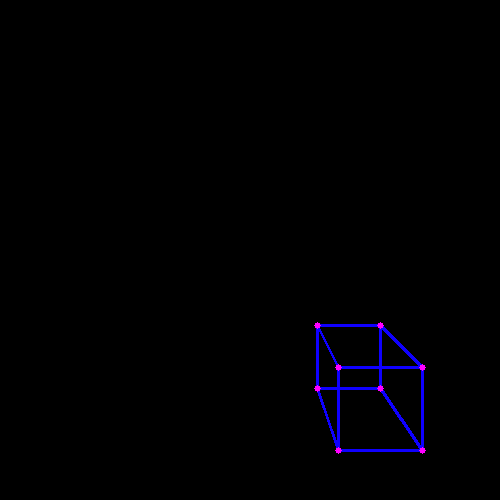

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

# Funciones
def draw(vertices, edges, im):
    """Dibuja objeto definido por vertices y bordes"""
    # Normalizar coordenadas homogeneas
    v_h = np.array([ v[:-2]/v[-1] for v in vertices])
    for e in edges:
        cv.line(im, tuple(v_h[e[0]].astype(int)), tuple(v_h[e[1]].astype(int)), (255,0,15), 2)
    for v in v_h:
        cv.circle(im, tuple(v.astype(int)), 3, (255,0,255),-1)

def translate3d(vertex, dx, dy, dz):
    translation_matrix = np.array([[1, 0, 0, dx],
                                    [0, 1, 0, dy],
                                    [0, 0, 1,dz],
                                    [0,0,0,1]])

    # Aplicar la matriz de traslación al cuadro
    traslate_cu = np.dot(translation_matrix, vertex.T).T

    return traslate_cu

def project2D(vertex, f=35):
    """Aplica una transformacion de proyeccion pinhole"""
    project_matrix = np.array([[1, 0, 0, 0],
                                [0, 1, 0, 0],
                                [0, 0, 1,0],
                                [0,0,1/f,1]])

    # Aplicar la matriz de traslación al cuadro
    project_cu = np.dot(project_matrix, vertex.T).T

    return project_cu


# Definir geometría
# Cubo definido en su sistema coordenado
# Lista de vertices [[x, y, z,1], ...
# List de bordes que relacionan los indices de los vertices
# [(0,1), (1,2), ....
v = np.array([[0,100,100,1],[0,100,0,1],[100,100,0,1],[100,0,0,1],[100,0,100,1],[0,0,100,1],[0,0,0,1],[100,100,100,1]])
edges = [(0,1),(1,2),(2,3),(3,4),(4,5),(5,0),(5,6),(1,6),(6,3),(7,4),(0,7),(7,2)]



# Parametros camara
f = 200 # Distancia focal
# Tamano imagen
w = 500
h = 500



# Trasladar la proyección al centro de la imagen
v_p = translate3d(project2D(translate3d(v,100,200,50),255),255,200,50)

# Dibujar y mostrar
im = np.zeros((h,w,3), np.uint8)
draw(v_p, edges, im)
cv2_imshow(im)